## Mood Dynamics in a Markov Marriage

In [2]:
import pandas as pd

# Define the states
states = [0, 1, 2]

# Function to compute the transition probabilities
def transition_probabilities(H_prev):
    p = (1 + H_prev) / 4  # Probability that John or Mary is happy
    prob_0 = (1 - p) ** 2         # Both unhappy
    prob_1 = 2 * p * (1 - p)      # One happy
    prob_2 = p ** 2               # Both happy
    return [prob_0, prob_1, prob_2]

# Build the transition matrix
transition_matrix = []
for h in states:
    transition_matrix.append(transition_probabilities(h))

# Create a pandas DataFrame for visualization
df = pd.DataFrame(
    transition_matrix,
    index=[f'From {i}' for i in states],
    columns=[f'To {j}' for j in states]
)

print("Transition Matrix:")
print(df.round(4))  # Rounded for neatness


Transition Matrix:
          To 0   To 1    To 2
From 0  0.5625  0.375  0.0625
From 1  0.2500  0.500  0.2500
From 2  0.0625  0.375  0.5625


## Graph Visualization

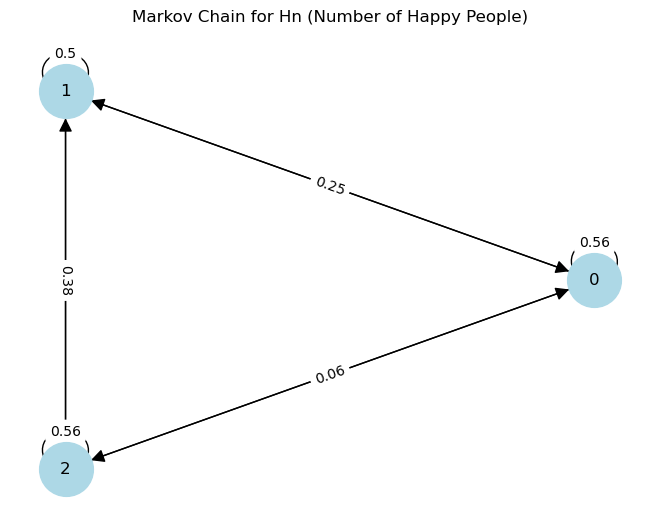

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Define states and transition matrix
states = [0, 1, 2]
P = [
    [0.5625, 0.375, 0.0625],
    [0.25,   0.5,   0.25],
    [0.0625, 0.375, 0.5625]
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges with weights
for i in range(3):
    for j in range(3):
        if P[i][j] > 0.01:  # Only show significant transitions
            G.add_edge(i, j, weight=round(P[i][j], 2))

# Set positions and draw
pos = nx.circular_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Markov Chain for Hn (Number of Happy People)")
plt.show()